# INTRODUCTION
1.  The purpose of this notebook is to explore and develop a project using Time Series Analsys 
2.  The notebook was written in R. R has a set of libraries that work better for timeseries analysis, like the prophet, forecast and others.
3. A complementary script in python will be used to explore time series, using ANN, specially LSTM. Neural Networks, specially Deep Learning networks seems to work well with time series. 
4. Both scripts are part of my personal 'Time Series Playground' projetct, deployed in my Git Hub as a personal project.

## Before starting
Since we are using R environment, I just call the dplyr load the iris dataset just to see if R is working.

In [1]:
library(dplyr)
library(tidyr)
library("xts")
iris


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [2]:
install.packages('forecast')
library(forecast)


  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.14 8.21.1              TRUE

  Binaries will be installed
package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ANACONDA3\envs\time_series_environment\Lib\R\library\00LOCK\forecast\libs\x64\forecast.dll to C:\ANACONDA3\envs\time_series_environment\Lib\R\library\forecast\libs\x64\forecast.dll: Permission denied"Warning message:
"restored 'forecast'"


The downloaded binary packages are in
	C:\Users\marco\AppData\Local\Temp\RtmpCgldSt\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


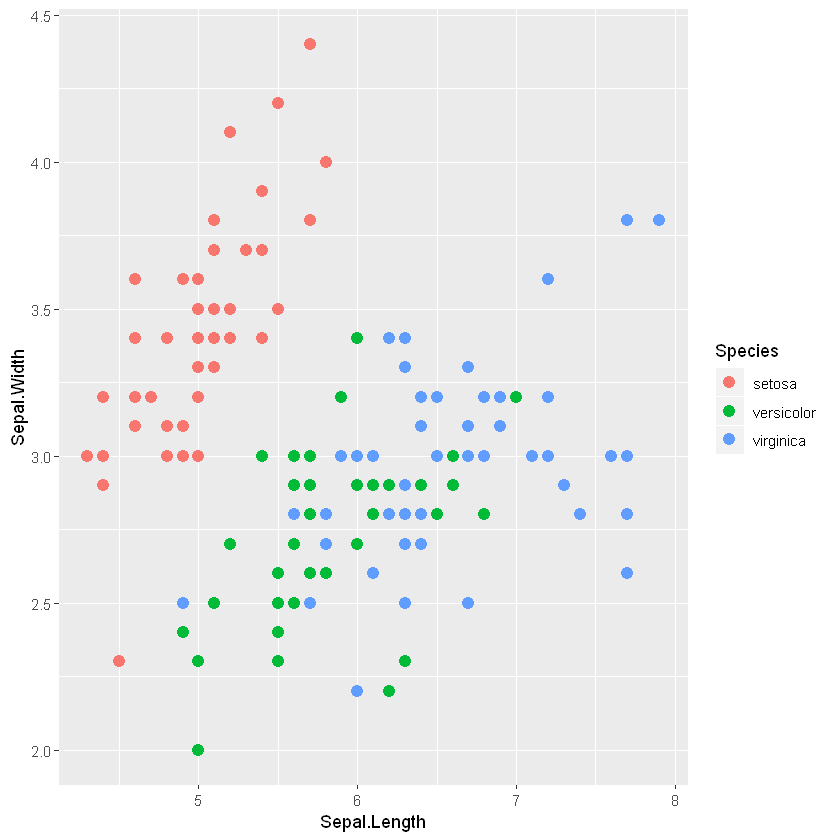

In [3]:
library(ggplot2)
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=3)

# 1. Dataset

Para brincarmos um pouco com as séries temporais, foi carregado o conjunto de dados IPI_6980 que tem o valor em moeda corrente do IPI entre os anos de 1969 e 1980.

Antes de efetuar a análise, os dados do arquivo de dados precisam passar por algumas transformações e limpeza para depois serem transformados em uma série temporal.

Iremos trabalhar com o pacote forecast, que necessita que os dados estejam em formato de série temporal univriada. Nesse pacote, iremos usar a função AutoArima e as funções ACF e Pacf, essas duas últimas para imprimir o gráfico da função de autocorrelação e autocorrelação parcial, respectivamente.

In [4]:
install.packages("xlsx")
library(xlsx)

package 'xlsx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xlsx'"Warning message:
"restored 'xlsx'"


The downloaded binary packages are in
	C:\Users\marco\AppData\Local\Temp\RtmpCgldSt\downloaded_packages


Warning message:
"package 'xlsx' was built under R version 3.6.3"

In [5]:
df <- read.xlsx("IPI_6980.xls",sheetIndex = 1,stringsAsFactors = FALSE,colClasses = c("integer", "character", "double"))
df

Ano,Mês,IPI
1969,jan,7780
NA,fev,7351
NA,mar,8317
NA,abr,8036
NA,mai,8424
NA,jun,8300
NA,jul,8985
NA,ago,8589
NA,set,8564
NA,out,8614


In [6]:
str(df)

'data.frame':	144 obs. of  3 variables:
 $ Ano: int  1969 NA NA NA NA NA NA NA NA NA ...
 $ Mês: chr  "jan" "fev" "mar" "abr" ...
 $ IPI: num  7780 7351 8317 8036 8424 ...


In [7]:
df$IPI2 = as.numeric(df$IPI)

In [8]:
df

Ano,Mês,IPI,IPI2
1969,jan,7780,7780
NA,fev,7351,7351
NA,mar,8317,8317
NA,abr,8036,8036
NA,mai,8424,8424
NA,jun,8300,8300
NA,jul,8985,8985
NA,ago,8589,8589
NA,set,8564,8564
NA,out,8614,8614


# 2. Transformando a série temporal 

## 2.1. Acrescentando os anos
É necessário fazer uma transformação no atributo ano. Além disso, é necessário eliminar as colunas com NA, a partir de agosto de 1980

In [9]:
for(i in 1:nrow(df)){
    #print(i)
    if(i>= 1  &  i<= 12 ){ df[i,'Ano']<-  1969 }
    if(i>= 13  &  i<= 24 ){ df[i,'Ano']<- 1970 }
    if(i>= 25  &  i<= 36 ){ df[i,'Ano']<- 1971 }
    if(i>= 37  &  i<= 48 ){ df[i,'Ano']<- 1972 }
    if(i>= 49  &  i<= 60 ){ df[i,'Ano']<- 1973 }
    if(i>= 61  &  i<= 72 ){ df[i,'Ano']<- 1974 }
    if(i>= 73  &  i<= 84 ){ df[i,'Ano']<- 1975 }
    if(i>= 85  &  i<= 96 ){ df[i,'Ano']<- 1976 }
    if(i>= 97  &  i<= 108 ){ df[i,'Ano']<- 1977 }
    if(i>= 109  &  i<= 120 ){ df[i,'Ano']<- 1978 }
    if(i>= 121  &  i<= 132 ){ df[i,'Ano']<- 1979 }
    if(i>= 133  &  i<= 144 ){ df[i,'Ano']<- 1980 }
    if(i>= 145  &  i<= 156 ){ df[i,'Ano']<- 1981 }
}

#df

## 2.2.  Modificando os meses
Vamos acrescentar uma coluna nova, ,mapeando o mês em 'português' para seu equivalente numérico, com a finalidade de, posteriormente, transformar o dataframe em um 'timeseries' object. Esse último, será usado na função SARIMA e nas outras funções de séries temporais.

Antes dessa transformação, vamos eliminar todas as linhas onde há o valor 'NA'

In [10]:
clean_df <- subset(df,IPI!='NA')
#clean_df

In [11]:
clean_df$month[clean_df$Mês=='jan']<-"01"
clean_df$month[clean_df$Mês=='fev']<-"02"
#
clean_df$month[clean_df$Mês=='mar']<-"03"
clean_df$month[clean_df$Mês=='mer']<-"03"
#
clean_df$month[clean_df$Mês=='abr']<-"04"
clean_df$month[clean_df$Mês=='mai']<-"05"
#
clean_df$month[clean_df$Mês=='jun']<-"06"
clean_df$month[clean_df$Mês=='jul']<-"07"
#
clean_df$month[clean_df$Mês=='ago']<-"08"
clean_df$month[clean_df$Mês=='set']<-"09"
#
clean_df$month[clean_df$Mês=='out']<-"10"
clean_df$month[clean_df$Mês=='nov']<-"11"
#
clean_df$month[clean_df$Mês=='dez']<-"12"

clean_df



Ano,Mês,IPI,IPI2,month
1969,jan,7780,7780,01
1969,fev,7351,7351,02
1969,mar,8317,8317,03
1969,abr,8036,8036,04
1969,mai,8424,8424,05
1969,jun,8300,8300,06
1969,jul,8985,8985,07
1969,ago,8589,8589,08
1969,set,8564,8564,09
1969,out,8614,8614,10


## 2.3. Criando uma coluna de Data
A coluna de data combina o Ano, o mês( no formato numérico, criado nos passos anteriores) e acrescido do dia primeiro no formato '01'. 

In [12]:
clean_df$Date <- paste(clean_df$Ano,'-',clean_df$month,'-01',sep='')
clean_df <-as.data.frame(clean_df)
clean_df

Ano,Mês,IPI,IPI2,month,Date
1969,jan,7780,7780,01,1969-01-01
1969,fev,7351,7351,02,1969-02-01
1969,mar,8317,8317,03,1969-03-01
1969,abr,8036,8036,04,1969-04-01
1969,mai,8424,8424,05,1969-05-01
1969,jun,8300,8300,06,1969-06-01
1969,jul,8985,8985,07,1969-07-01
1969,ago,8589,8589,08,1969-08-01
1969,set,8564,8564,09,1969-09-01
1969,out,8614,8614,10,1969-10-01


# 2.4. Transformar o campo Date de String para o formato Date
Até agora, o campo Date está em formato 'string'. Para transformar o dataframe em time series, é necessário converter aquele campo para o formato Date ( Ano-mes-dia)

In [13]:
clean_df$Date <- as.Date(clean_df$Date,format="%Y-%m-%d")
clean_df

Ano,Mês,IPI,IPI2,month,Date
1969,jan,7780,7780,01,1969-01-01
1969,fev,7351,7351,02,1969-02-01
1969,mar,8317,8317,03,1969-03-01
1969,abr,8036,8036,04,1969-04-01
1969,mai,8424,8424,05,1969-05-01
1969,jun,8300,8300,06,1969-06-01
1969,jul,8985,8985,07,1969-07-01
1969,ago,8589,8589,08,1969-08-01
1969,set,8564,8564,09,1969-09-01
1969,out,8614,8614,10,1969-10-01


## Transformar o campo IPI como numérico

In [14]:
str(clean_df)

'data.frame':	139 obs. of  6 variables:
 $ Ano  : num  1969 1969 1969 1969 1969 ...
 $ Mês  : chr  "jan" "fev" "mar" "abr" ...
 $ IPI  : num  7780 7351 8317 8036 8424 ...
 $ IPI2 : num  7780 7351 8317 8036 8424 ...
 $ month: chr  "01" "02" "03" "04" ...
 $ Date : Date, format: "1969-01-01" "1969-02-01" ...


In [15]:
clean_df

Ano,Mês,IPI,IPI2,month,Date
1969,jan,7780,7780,01,1969-01-01
1969,fev,7351,7351,02,1969-02-01
1969,mar,8317,8317,03,1969-03-01
1969,abr,8036,8036,04,1969-04-01
1969,mai,8424,8424,05,1969-05-01
1969,jun,8300,8300,06,1969-06-01
1969,jul,8985,8985,07,1969-07-01
1969,ago,8589,8589,08,1969-08-01
1969,set,8564,8564,09,1969-09-01
1969,out,8614,8614,10,1969-10-01


# 2.5. Transformando o Data Frame para um objeto TS
Finalmente, transformamos o dataframe para um objeto Time Series.

In [16]:
df_ts <- xts(clean_df$IPI2, clean_df$Date,frequency = 12) 
df_ts     
  
is.xts(df_ts)

            [,1]
1969-01-01  7780
1969-02-01  7351
1969-03-01  8317
1969-04-01  8036
1969-05-01  8424
1969-06-01  8300
1969-07-01  8985
1969-08-01  8589
1969-09-01  8564
1969-10-01  8614
1969-11-01  8102
1969-12-01  8044
1970-01-01  8209
1970-02-01  7738
1970-03-01  8828
1970-04-01  9150
1970-05-01  8960
1970-06-01  9282
1970-07-01  9934
1970-08-01  9546
1970-09-01  9752
1970-10-01 10272
1970-11-01  9991
1970-12-01  9537
1971-01-01  8761
1971-02-01  8501
1971-03-01  9642
1971-04-01  9058
1971-05-01  9256
1971-06-01  9799
1971-07-01 10828
1971-08-01 11063
1971-09-01 10652
1971-10-01 11278
1971-11-01 10661
1971-12-01 10500
1972-01-01  9579
1972-02-01  9876
1972-03-01 10664
1972-04-01 10110
1972-05-01 11055
1972-06-01 11615
1972-07-01 11730
1972-08-01 12587
1972-09-01 12046
1972-10-01 12852
1972-11-01 12259
1972-12-01 12214
1973-01-01 11798
1973-02-01 11278
1973-03-01 11945
1973-04-01 11695
1973-05-01 12734
1973-06-01 13405
1973-07-01 13836
1973-08-01 14388
1973-09-01 14069
1973-10-01 155

[1] TRUE

In [17]:
class(df_ts)

[1] "xts" "zoo"

In [18]:
#df_ts<-ts(df_ts,frequency=12)
df_ts<-ts(df_ts,start=c(1969,1),frequency=12)

# 3. SARIMA

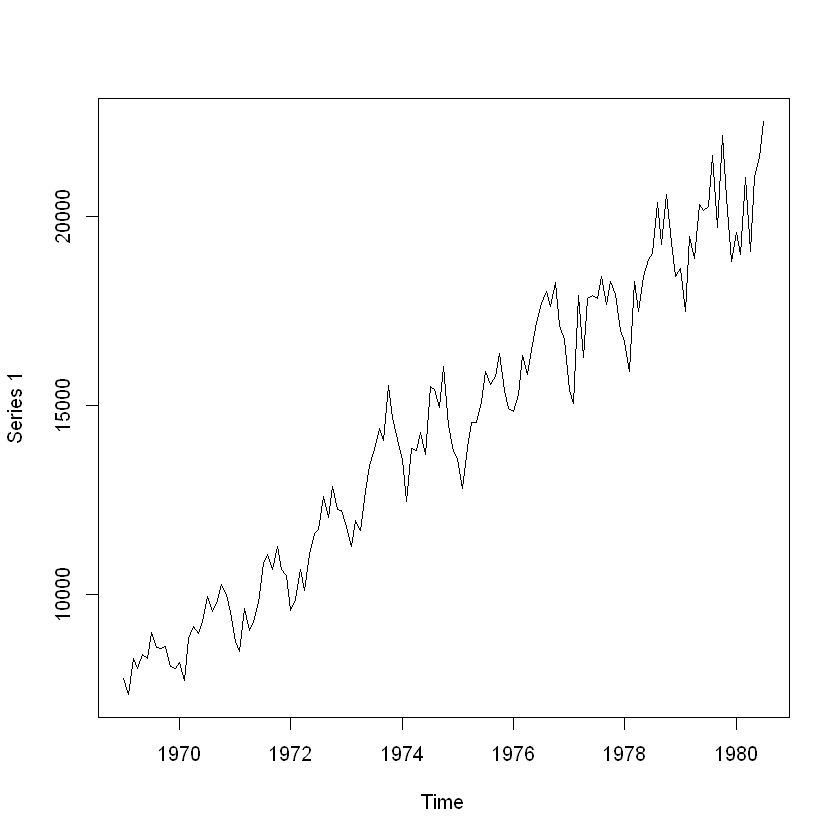

In [19]:
plot(df_ts)

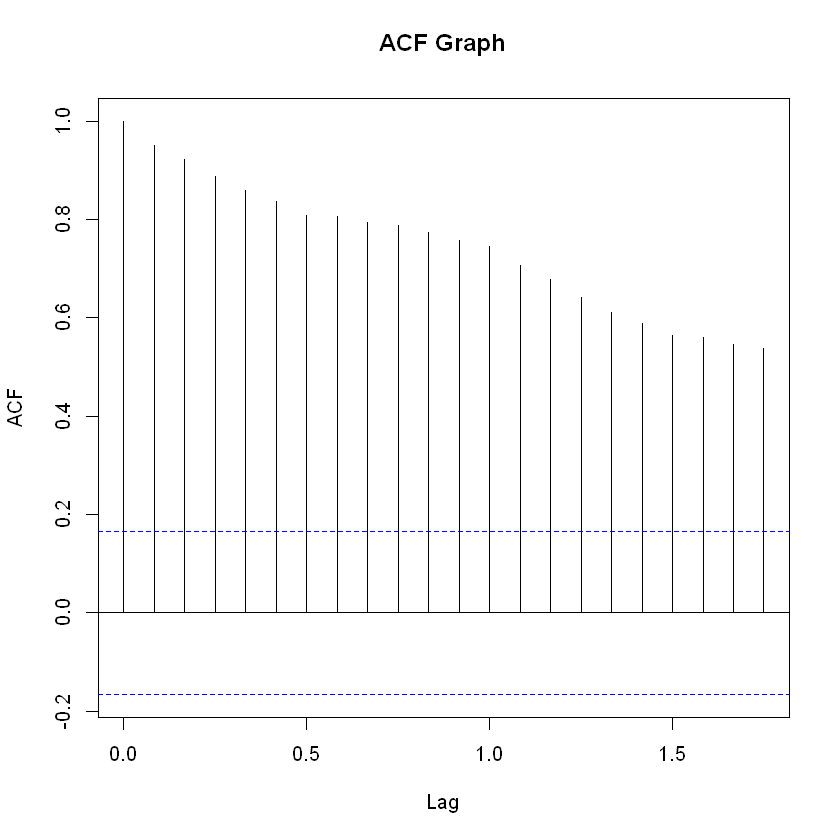

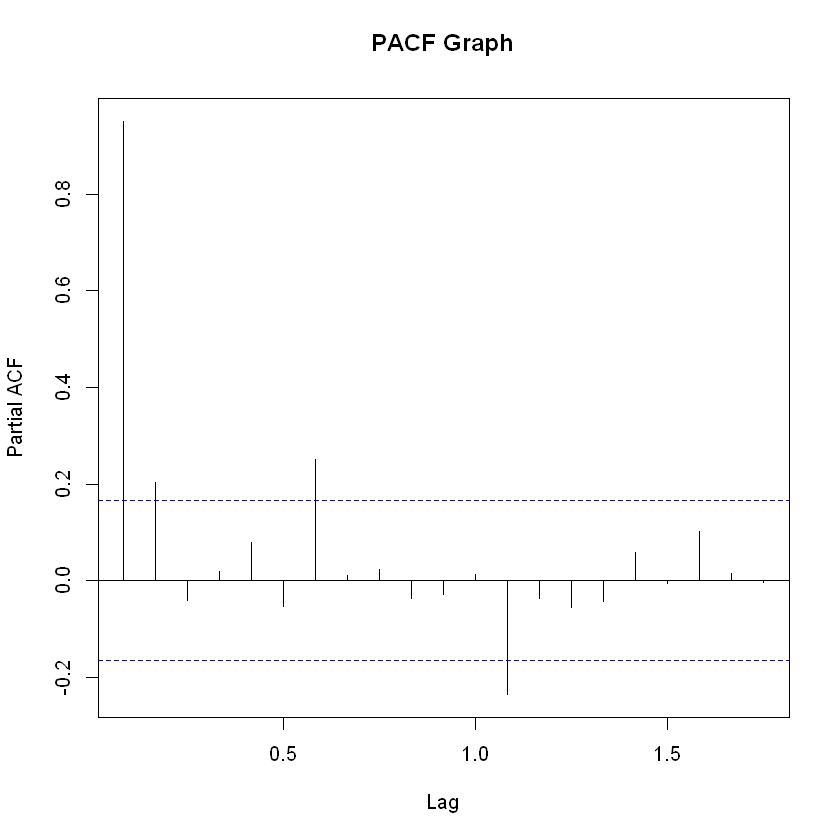

In [27]:
acf(df_ts,  main="ACF Graph")
pacf(df_ts, main="PACF Graph")

A visualização do gráfico mostra três características que serão confirmadas mais formalmente:

1. A série apresenta uma tendência, isto é, o IPI está aumentando nos 12 anos da série
2. A série mostra alguns picos de sazonalidade
3. A série não é estacionária

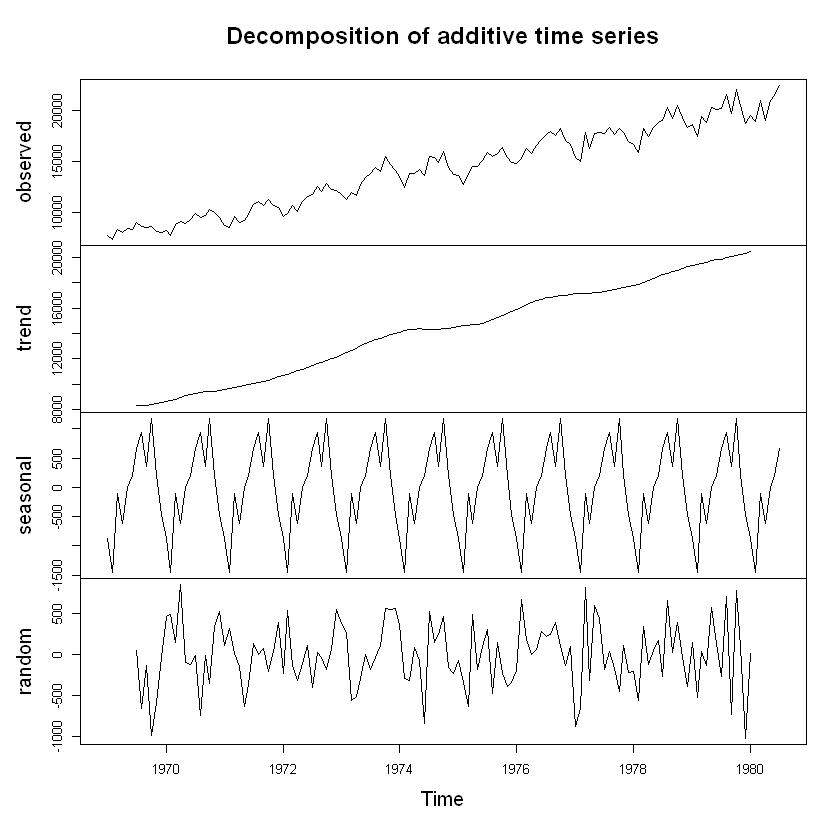

In [20]:
dec_add <- decompose(df_ts,type='additive')
plot(dec_add)

In [21]:
model <- auto.arima(df_ts) 
model

Series: df_ts 
ARIMA(1,0,1)(2,1,1)[12] with drift 

Coefficients:
         ar1      ma1    sar1     sar2     sma1    drift
      0.8354  -0.4115  0.1585  -0.1985  -0.5775  97.2691
s.e.  0.0739   0.1153  0.1662   0.1152   0.1597   5.8138

sigma^2 estimated as 235142:  log likelihood=-965.43
AIC=1944.85   AICc=1945.79   BIC=1964.76

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Aug 1980       22863.87 22242.43 23485.32 21913.45 23814.29
Sep 1980       21521.59 20846.61 22196.57 20489.29 22553.88
Oct 1980       23148.79 22438.83 23858.75 22063.00 24234.58
Nov 1980       21845.89 21112.50 22579.27 20724.27 22967.50
Dec 1980       20557.47 19808.17 21306.77 19411.52 21703.42
Jan 1981       20732.00 19971.79 21492.21 19569.36 21894.64
Feb 1981       20176.90 19409.17 20944.63 19002.76 21351.05
Mar 1981       22198.55 21425.61 22971.49 21016.44 23380.66
Apr 1981       20711.53 19934.97 21488.08 19523.89 21899.16
May 1981       22251.30 21472.24 23030.37 21059.83 23442.78


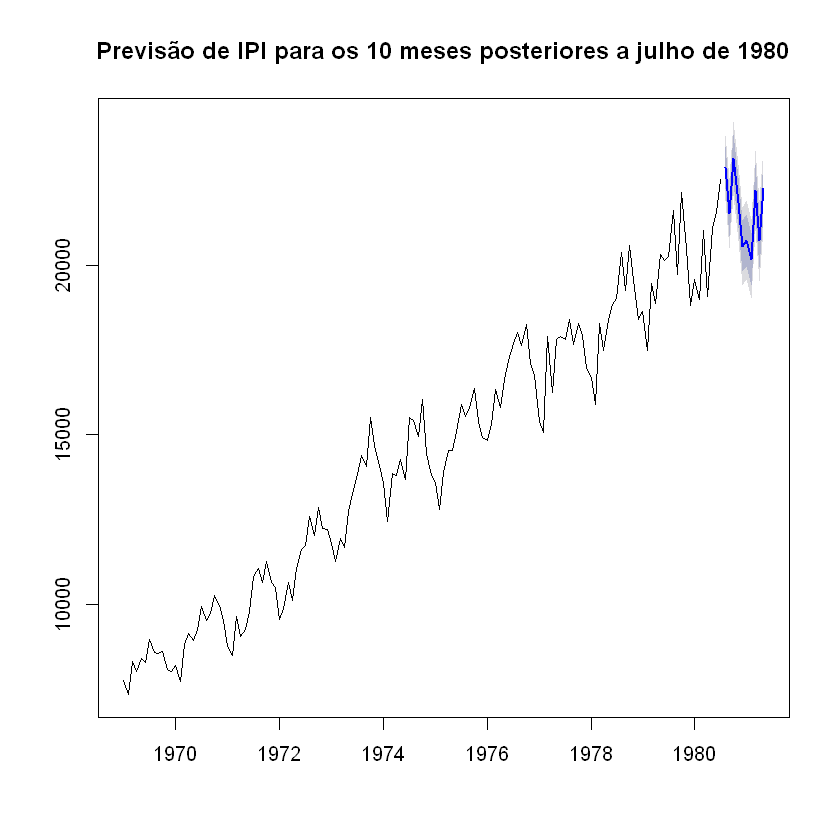

In [22]:
# Next 10 forecasted values  


forecast_data <- forecast(model, 10) 


print(forecast_data)


plot(forecast_data, main = "Previsão de IPI para os 10 meses posteriores a julho de 1980") 